In [38]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def model(x, a, b):
    return a + b * x ** 2

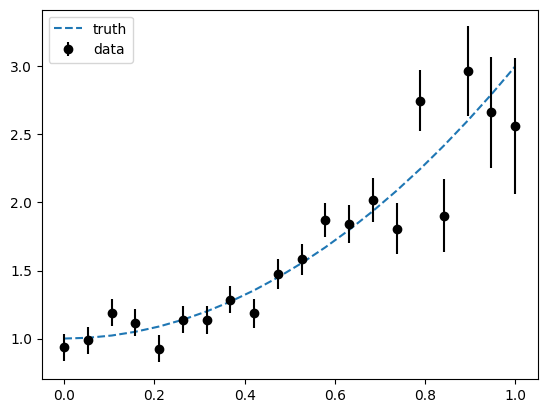

In [40]:
# random values

rng = np.random.default_rng(4)

truth = 1, 2
x = np.linspace(0, 1, 20)
yt = model(x, *truth)
ye = 0.4 * x**5 + 0.1
y = rng.normal(yt, ye)

plt.plot(x, yt, ls="--", label="truth")
plt.errorbar(x, y, ye, fmt="ok", label="data")
plt.legend(loc="upper left")
plt.show()

In [50]:
c = LeastSquares(x, y, ye, model)
m = Minuit(c, a=5, b=5,
           error_a=0.1, error_b=0.1,
           limit_a=(0, None), limit_b=(0, 10),
           errordef=1)
# m = Minuit(c, a=0, b=0, error_a=0.1, error_b=0.1, limit_a=(-10, 10), limit_b=(-10, 10))
display(m)

RuntimeError: error_a is not one of the parameters [a b]